

Import necessary libraries



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
!pip install scikit-learn==1.4.1.post1 numpy==1.26.4


Load and Preprocess the Dataset

In [ ]:
# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/Dspyl MiniProject/Dataset/credit_risk.csv")

Data Exploration :1. Descriptive Statistics

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Id  Age  Income      Home  Emp_length     Intent  Amount   Rate  Status  \
0   0   22   59000      RENT       123.0   PERSONAL   35000  16.02       1   
1   1   21    9600       OWN         5.0  EDUCATION    1000  11.14       0   
2   2   25    9600  MORTGAGE         1.0    MEDICAL    5500  12.87       1   
3   3   23   65500      RENT         4.0    MEDICAL   35000  15.23       1   
4   4   24   54400      RENT         8.0    MEDICAL   35000  14.27       1   

   Percent_income Default  Cred_length  
0            0.59       Y            3  
1            0.10       N            2  
2            0.57       N            3  
3            0.53       N            2  
4            0.55       Y            4  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [ ]:
print("\nDescriptive statistics for numerical variables:")
data.describe()


Descriptive statistics for numerical variables:


,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
data.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [ ]:
print("\nFrequency table for categorical variables:")
categorical_cols = ['Home', 'Intent', 'Status', 'Default']
for col in categorical_cols:
    print("\n", col)
    print(data[col].value_counts())


Frequency table for categorical variables:

 Home
Home
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

 Intent
Intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

 Status
Status
0    25473
1     7108
Name: count, dtype: int64

 Default
Default
N    26836
Y     5745
Name: count, dtype: int64


Data Exploration:-2. Data Visualization

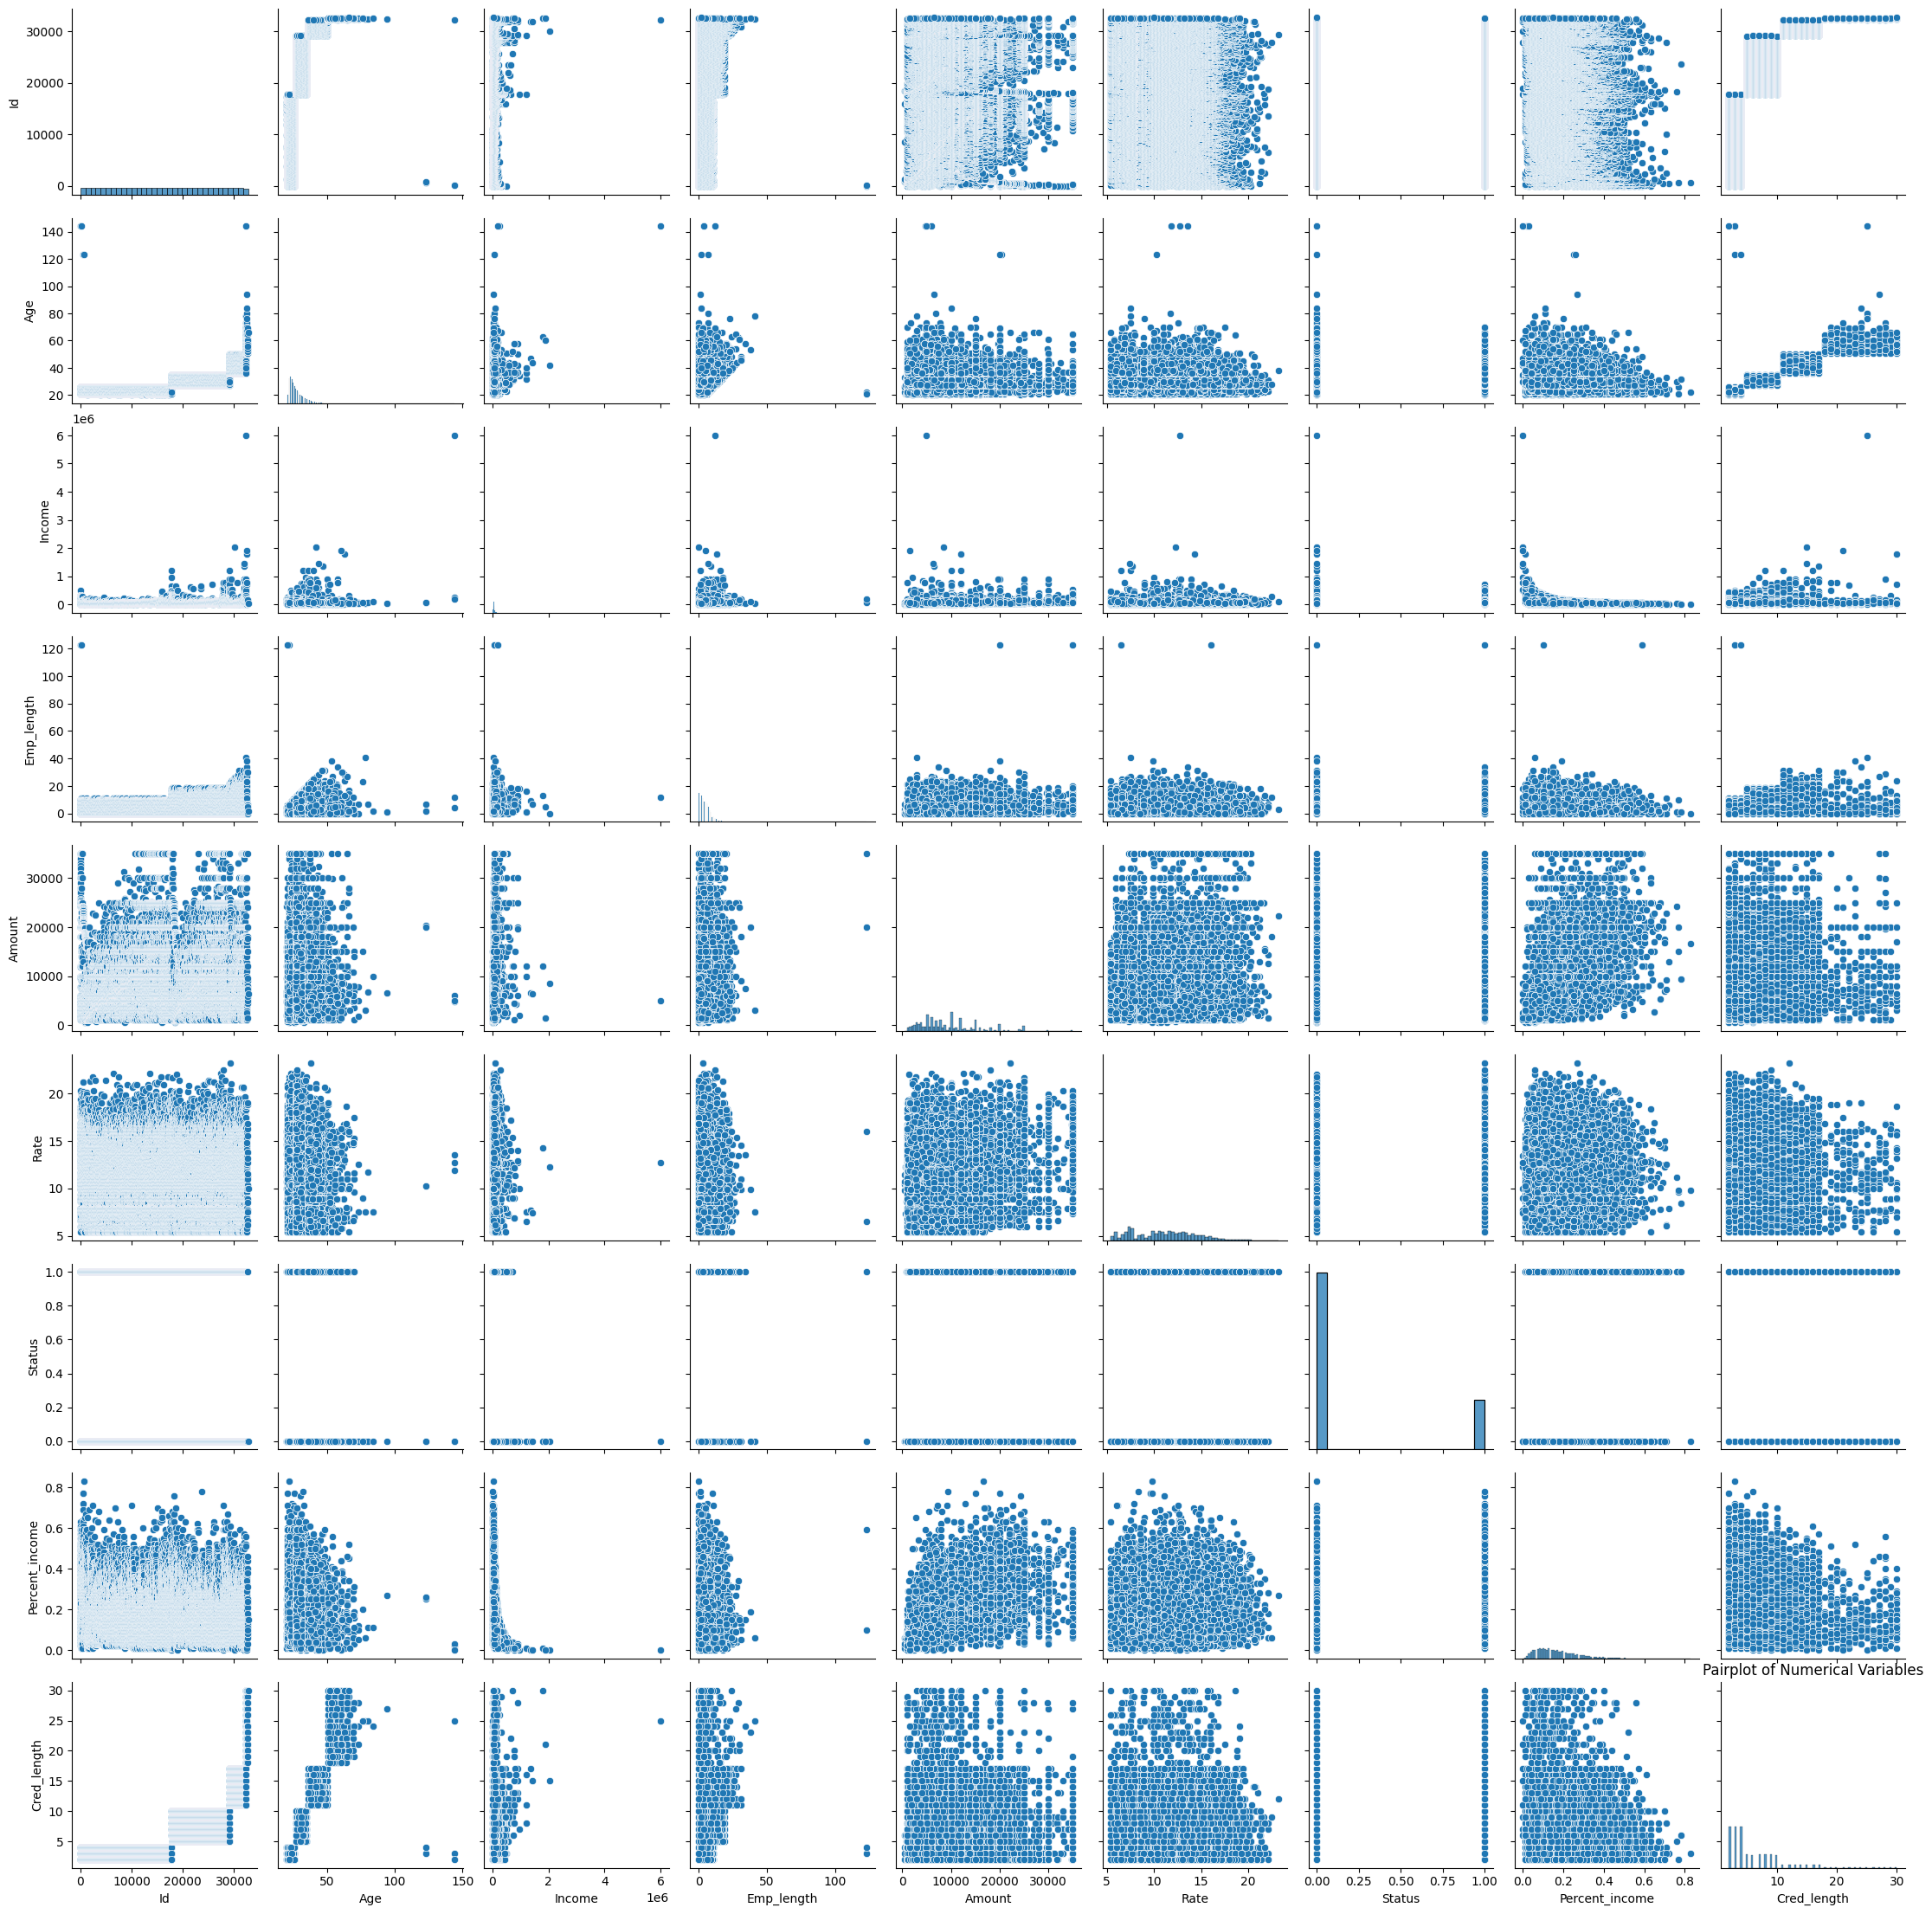

In [ ]:
# Scatter plot for numerical variables
sns.pairplot(data, kind='scatter')
plt.title('Pairplot of Numerical Variables')
plt.show()

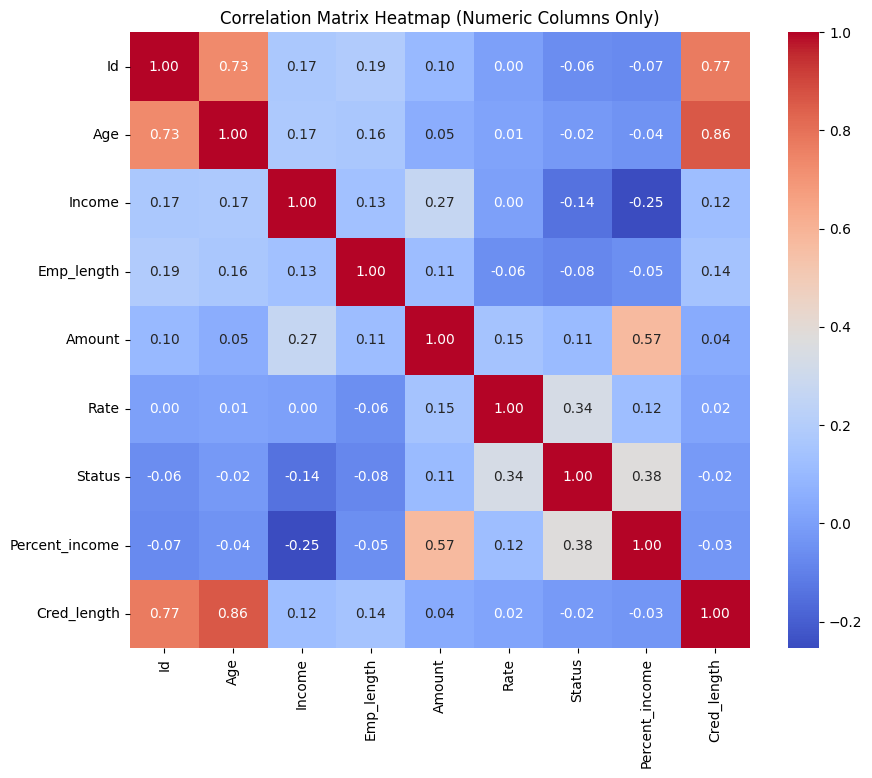

In [ ]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include='number')

# Compute correlation matrix for numeric columns
correlation_matrix = numeric_cols.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Numeric Columns Only)')
plt.show()

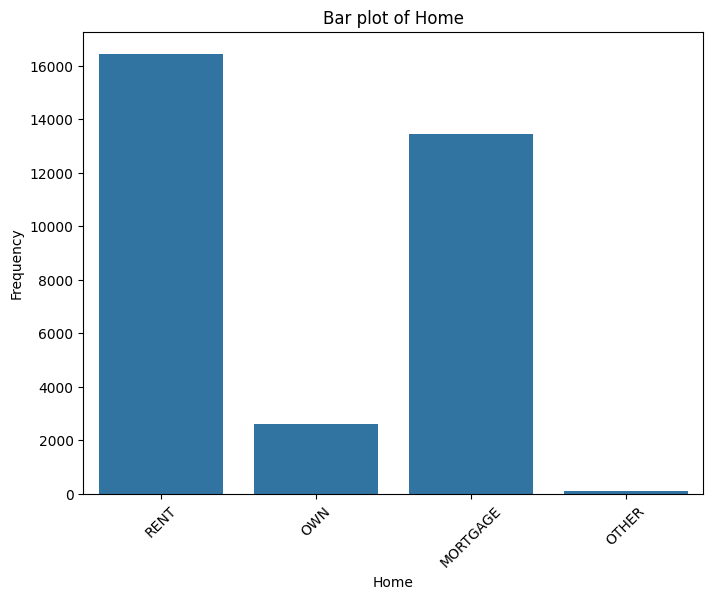

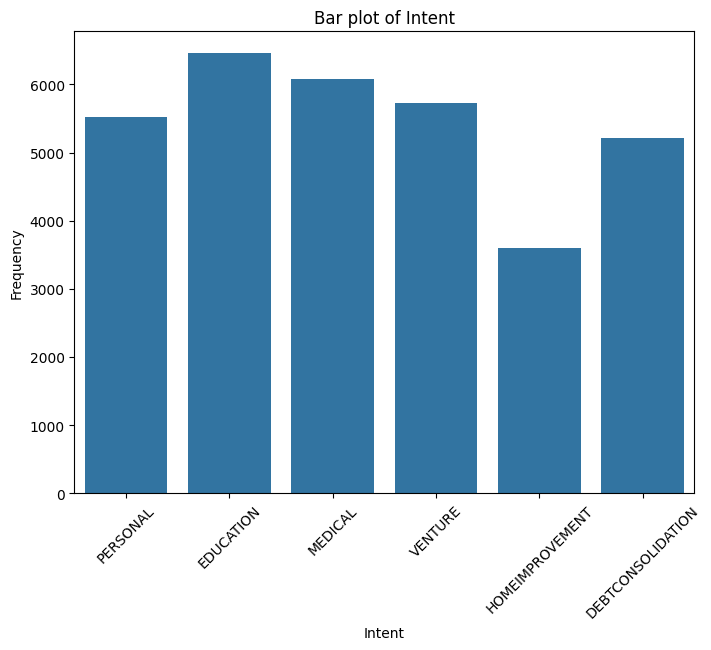

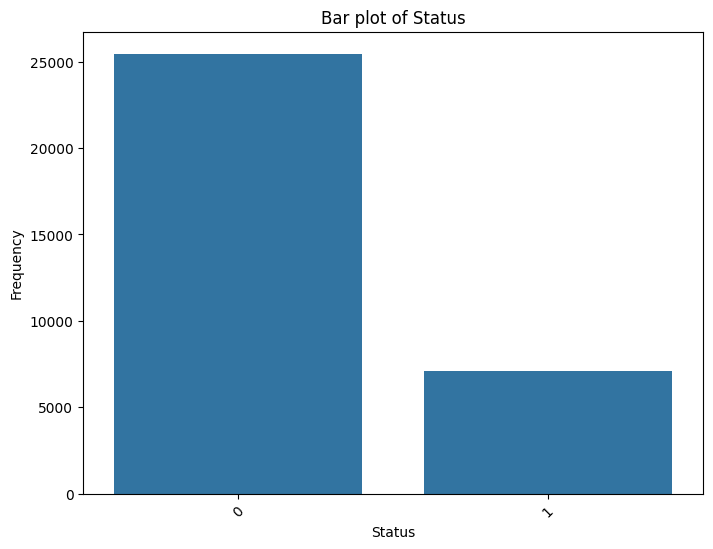

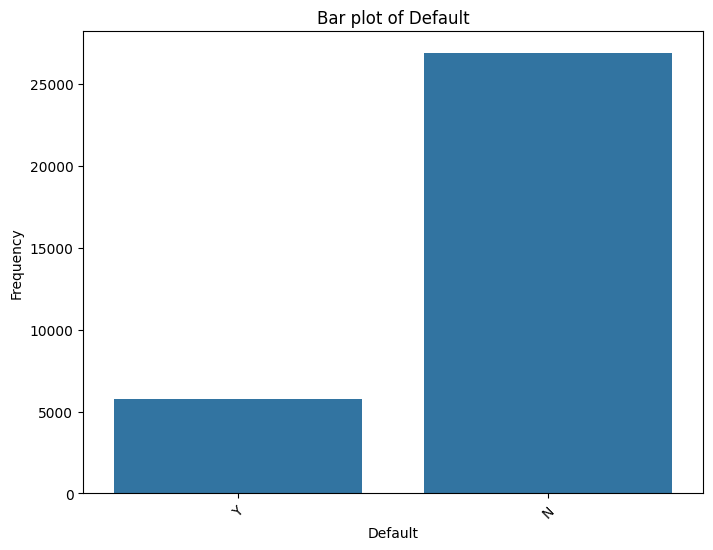

In [ ]:
# Bar plot for categorical variables
categorical_cols = ['Home', 'Intent', 'Status', 'Default']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Bar plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

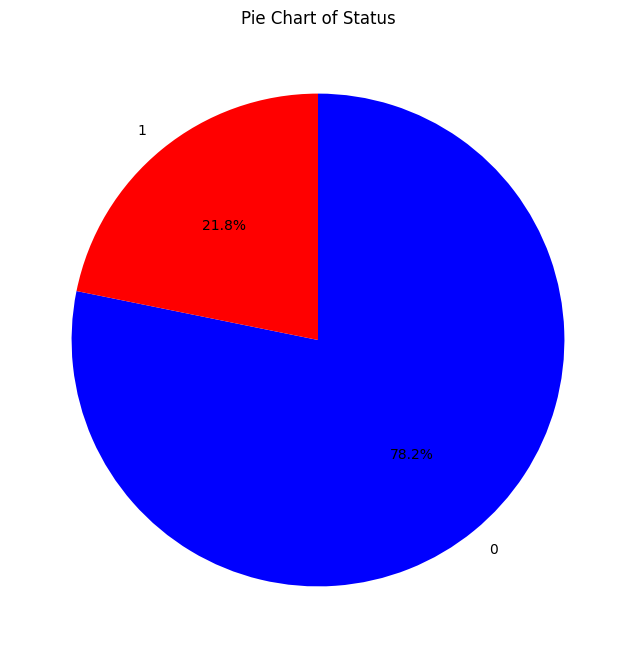

In [ ]:
# Count the occurrences of each Status
fraud_label_counts = data['Status'].value_counts()

# Set up the figure
plt.figure(figsize=(8, 8))

# Define colors (red for fraud, blue for non-fraud)
colors = ['blue', 'red']

# Create a pie chart using seaborn with custom colors
plt.pie(fraud_label_counts, labels=fraud_label_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops=dict(width=1), colors=colors)

# Set plot title
plt.title('Pie Chart of Status')

# Show the plot
plt.show()

Data Preprocessing:-1. Data Cleaning

In [ ]:
# Select columns with missing values
columns_with_missing = ['Emp_length', 'Rate']

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values
data_imputed = pd.DataFrame(imputer.fit_transform(data[columns_with_missing]), columns=columns_with_missing)

# Replace columns with imputed values
data['Emp_length'] = data_imputed['Emp_length']
data['Rate'] = data_imputed['Rate']

In [ ]:
data.isnull().sum()

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

Data Preprocesssing:-2. Data Transformation

In [ ]:
# Preprocess the data
data = data.drop(columns=['Id'])  # Removing the unique identifier
data = pd.get_dummies(data, columns=['Home', 'Intent', 'Default'])  # One-hot encoding categorical variables

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       32581 non-null  int64  
 1   Income                    32581 non-null  int64  
 2   Emp_length                32581 non-null  float64
 3   Amount                    32581 non-null  int64  
 4   Rate                      32581 non-null  float64
 5   Status                    32581 non-null  int64  
 6   Percent_income            32581 non-null  float64
 7   Cred_length               32581 non-null  int64  
 8   Home_MORTGAGE             32581 non-null  bool   
 9   Home_OTHER                32581 non-null  bool   
 10  Home_OWN                  32581 non-null  bool   
 11  Home_RENT                 32581 non-null  bool   
 12  Intent_DEBTCONSOLIDATION  32581 non-null  bool   
 13  Intent_EDUCATION          32581 non-null  bool   
 14  Intent

Split Data into Features and Target

In [ ]:
# Splitting data into features (X) and target (y)
X = data.drop(columns=['Status'])
y = data['Status']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26064 entries, 32377 to 23654
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       26064 non-null  int64  
 1   Income                    26064 non-null  int64  
 2   Emp_length                26064 non-null  float64
 3   Amount                    26064 non-null  int64  
 4   Rate                      26064 non-null  float64
 5   Percent_income            26064 non-null  float64
 6   Cred_length               26064 non-null  int64  
 7   Home_MORTGAGE             26064 non-null  bool   
 8   Home_OTHER                26064 non-null  bool   
 9   Home_OWN                  26064 non-null  bool   
 10  Home_RENT                 26064 non-null  bool   
 11  Intent_DEBTCONSOLIDATION  26064 non-null  bool   
 12  Intent_EDUCATION          26064 non-null  bool   
 13  Intent_HOMEIMPROVEMENT    26064 non-null  bool   
 14  Intent_

In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Make Predictions and Evaluate the Model

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

Visualize Random Forest Feature Importance

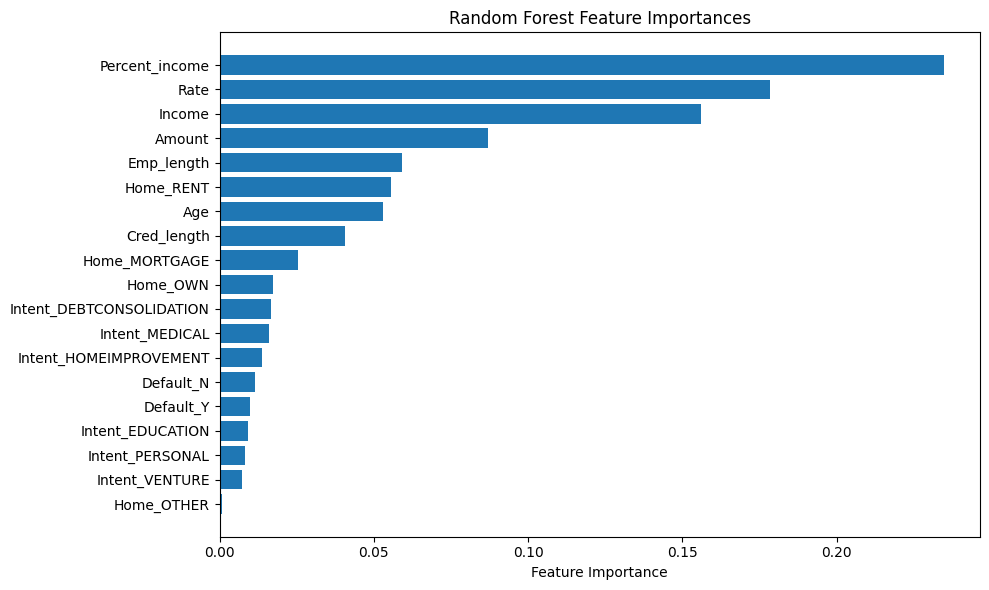

In [ ]:
# Plot feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

Visualize Confusion Matrix

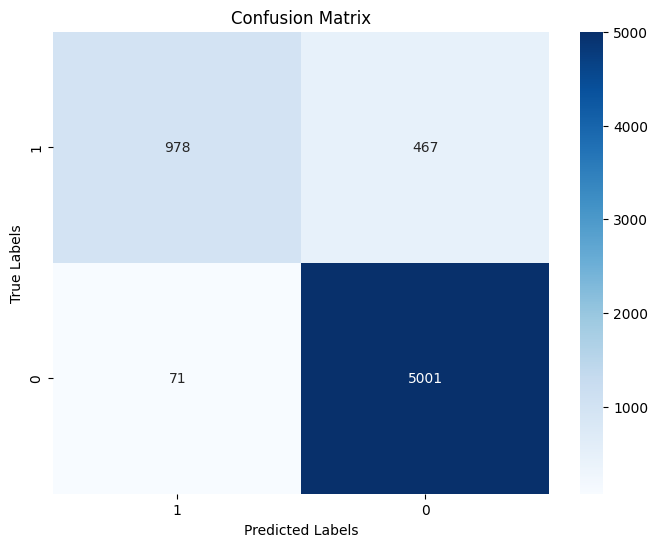

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=y.unique())
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

**Print Accuracy and Classification Report**



In [ ]:
# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.917446677919288
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      5072
           1       0.93      0.68      0.78      1445

    accuracy                           0.92      6517
   macro avg       0.92      0.83      0.87      6517
weighted avg       0.92      0.92      0.91      6517



Testing with Different Algo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)

# Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

# Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

# Evaluate classifiers
classifiers = {
    "Naive Bayes": nb_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred
}

for clf_name, clf_pred in classifiers.items():
    print(f"\n{clf_name} Classifier:")
    print("Accuracy Score:", accuracy_score(y_test, clf_pred))
    print("Classification Report:")
    print(classification_report(y_test, clf_pred))



Naive Bayes Classifier:
Accuracy Score: 0.8106490716587387
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      5072
           1       0.68      0.27      0.39      1445

    accuracy                           0.81      6517
   macro avg       0.75      0.62      0.64      6517
weighted avg       0.79      0.81      0.78      6517


Decision Tree Classifier:
Accuracy Score: 0.8775510204081632
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5072
           1       0.71      0.76      0.73      1445

    accuracy                           0.88      6517
   macro avg       0.82      0.83      0.83      6517
weighted avg       0.88      0.88      0.88      6517


Random Forest Classifier:
Accuracy Score: 0.9177535675924505
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99     

Cross Validation on Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Fit Random Forest classifier on the entire training data
rf_classifier.fit(X_train, y_train)

# Predict on test data
rf_pred = rf_classifier.predict(X_test)

# Evaluate accuracy on test data
accuracy = rf_classifier.score(X_test, y_test)

print("Cross-Validation Mean Accuracy:", cv_scores.mean())
print("Test Accuracy:", accuracy)


Cross-Validation Mean Accuracy: 0.9182012720133075
Test Accuracy: 0.918674236611938


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier()
}

# Dictionary to store accuracy scores
accuracy_scores = {}

# Iterate over classifiers
for clf_name, clf in classifiers.items():
    # Fit classifier on entire training data
    clf.fit(X_train, y_train)
    # Predict on test data
    y_pred = clf.predict(X_test)
    # Compute accuracy on test data
    accuracy_scores[clf_name] = clf.score(X_test, y_test)

    # Print cross-validation mean accuracy
    print(f"Cross-Validation Mean Accuracy for {clf_name}: {cv_scores.mean()}")

# Create DataFrame from accuracy scores
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Classifier', 'Accuracy Score'])
accuracy_df


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Cross-Validation Mean Accuracy for AdaBoost: 0.9182012720133075
Cross-Validation Mean Accuracy for Bagging: 0.9182012720133075


,Classifier,Accuracy Score
0,AdaBoost,0.873408
1,Bagging,0.917600


In [ ]:
import joblib

# Assuming you have a trained model named 'model'
joblib.dump(rf_classifier, 'modelupdated.pkl')


['modelupdated.pkl']

In [ ]:
import sklearn
import numpy

print("scikit-learn version:", sklearn.__version__)
print("numpy version:", numpy.__version__)
# Add similar lines for other packages as needed


scikit-learn version: 1.4.1.post1
numpy version: 1.26.4


In [ ]:

# Assuming your DataFrame is named df

# Select the columns of interest
columns_of_interest = ['Home_MORTGAGE', 'Home_OTHER', 'Home_OWN', 'Home_RENT',
                       'Intent_DEBTCONSOLIDATION', 'Intent_EDUCATION', 'Intent_HOMEIMPROVEMENT',
                       'Intent_MEDICAL', 'Intent_PERSONAL', 'Intent_VENTURE', 'Default_N', 'Default_Y']

# Get the mode (most frequent value) for each column
most_frequent_values = data[columns_of_interest].mode()

# Print the most frequent values
print("Most frequent values:")
print(most_frequent_values)


Most frequent values:
   Home_MORTGAGE  Home_OTHER  Home_OWN  Home_RENT  Intent_DEBTCONSOLIDATION  \
0          False       False     False       True                     False   

   Intent_EDUCATION  Intent_HOMEIMPROVEMENT  Intent_MEDICAL  Intent_PERSONAL  \
0             False                   False           False            False   

   Intent_VENTURE  Default_N  Default_Y  
0           False       True      False  
